## Titanic: Preprocessing

### Importing libraries

In [1]:
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Loading the dataset

In [2]:
df = pd.read_csv('./data/raw_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing features

In [4]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


We are sure, that we want to drop the ***PassengerId*** column.

In [5]:
df.select_dtypes(include=object).describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


From just looking at the stats, we can assume that we want to remove the ***Name***, ***Ticket*** and the ***Cabin***.

#### Handling NaNs

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\mike3\AppData\Local\Temp\ipykernel_7836\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


#### Sex Column

In [7]:
df.loc[df['Survived'] == 0 , 'Sex'].value_counts()

Sex
male      468
female     81
Name: count, dtype: int64

In [8]:
df.loc[df['Survived'] == 1 , 'Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [9]:
sex_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

#### Embarked Column

In [10]:
df.loc[df['Survived'] == 0 , 'Embarked'].value_counts() / df['Embarked'].value_counts()

Embarked
S    0.663043
C    0.446429
Q    0.610390
Name: count, dtype: float64

In [11]:
df.loc[df['Survived'] == 1 , 'Embarked'].value_counts() / df['Embarked'].value_counts()

Embarked
S    0.336957
C    0.553571
Q    0.389610
Name: count, dtype: float64

In [12]:
df = pd.get_dummies(df, columns=['Embarked']).drop(columns=['Embarked_Q'])
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


### Looking at the target variable

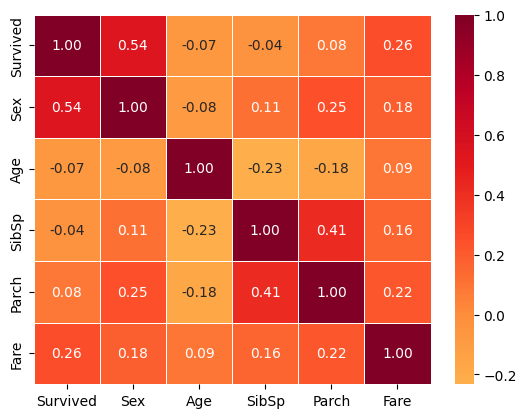

In [14]:
sns.heatmap(df[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, fmt=".2f", cmap='YlOrRd', center=0,
                linewidths=.5)
plt.show()

In [15]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Feature selection

In [16]:
FEATS_TO_DROP = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=FEATS_TO_DROP, inplace=True)

In [17]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_S    0
dtype: int64

### Splitting & Saving data

In [18]:
def applyScaling(X_train, X_test, y_train, y_test, scaler, columns):
    X_train[columns] = scaler.fit_transform(X_train[columns])
    X_test[columns] = scaler.fit_transform(X_test[columns])

    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])

    return pd.concat([X, y], axis=1)

In [19]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Survived']
y = df.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=256)

#### Normalization

In [20]:
from sklearn.preprocessing import Normalizer

df_normalized = applyScaling(X_train, X_test, y_train, y_test, Normalizer(), ['Fare', 'Age'])

#### Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

df_standardized = applyScaling(X_train, X_test, y_train, y_test, StandardScaler(), ['Fare', 'Age'])

#### Saving scaled data

In [22]:
df_normalized.to_csv('./data/normalized.csv', index=False)
df_standardized.to_csv('./data/standardized.csv', index=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    int32  
 8   Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB
